<a href="https://colab.research.google.com/github/shaybolo/mlp-activation-functionss/blob/main/Seun_Bolodeoku_Gen_AI_with_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install tensorflow numpy matplotlib

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Conv2D, UpSampling2D, BatchNormalization, LeakyReLU

def build_generator(latent_dim):
    model = tf.keras.Sequential()
    model.add(Dense(256, input_shape=(latent_dim,)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 16)))
    model.add(UpSampling2D())  # 8x8
    model.add(Conv2D(128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(UpSampling2D())  # 16x16
    model.add(Conv2D(3, kernel_size=3, padding='same', activation='tanh'))
    return model

latent_dim = 100
generator = build_generator(latent_dim)
generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 8, 8, 128)           │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,387 (189.01 KB)

 Trainable params: 48,131 (188.01 KB)

 Non-trainable params: 256 (1.00 KB)

In [6]:
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D

def build_discriminator(input_shape=(16, 16, 3)):
    model = tf.keras.Sequential()
    model.add(Conv2D(128, kernel_size=3, input_shape=input_shape, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(AveragePooling2D())
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator()
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: AveragePooling2D.__init__() missing 1 required positional argument: 'pool_size'

In [7]:
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D

def build_discriminator(input_shape=(16, 16, 3)):
    model = tf.keras.Sequential()
    model.add(Conv2D(128, kernel_size=3, input_shape=input_shape, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # Added pool_size argument to AveragePooling2D
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator()
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,473 (318.25 KB)

 Trainable params: 81,473 (318.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import numpy as np

def generate_and_save_images(generator, epoch, latent_dim=100):
    noise = np.random.normal(0, 1, (1, latent_dim))
    generated_image = generator.predict(noise)
    plt.imshow((generated_image[0] + 1) / 2)
    plt.axis('off')
    plt.show()

# Example loop for generating images
for epoch in range(5):
    generate_and_save_images(generator, epoch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


NameError: name 'plt' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


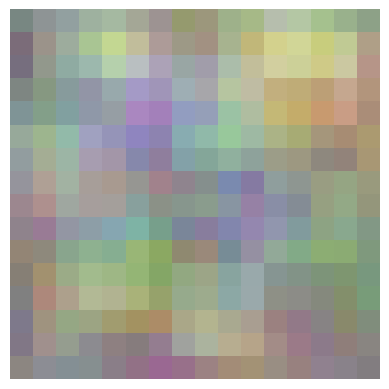

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


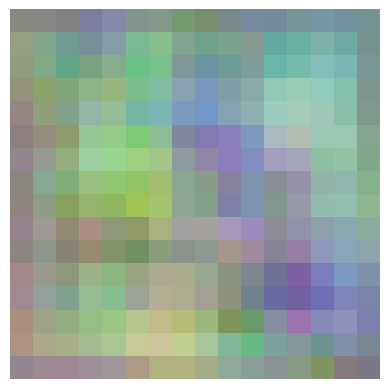

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


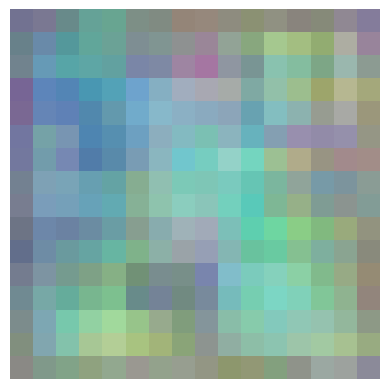

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


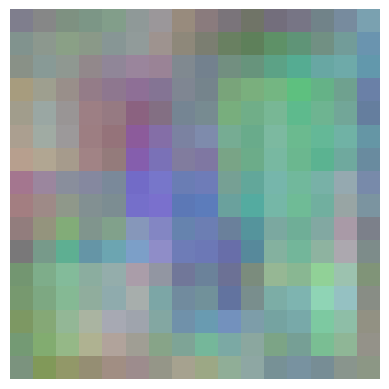

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


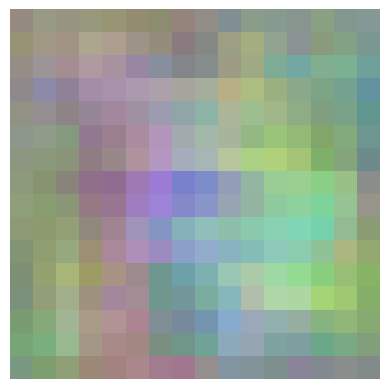

In [9]:
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

def generate_and_save_images(generator, epoch, latent_dim=100):
    noise = np.random.normal(0, 1, (1, latent_dim))
    generated_image = generator.predict(noise)
    plt.imshow((generated_image[0] + 1) / 2)
    plt.axis('off')
    plt.show()

# Example loop for generating images
for epoch in range(5):
    generate_and_save_images(generator, epoch)